In [24]:
import pandas as pd
from tabulate import tabulate
from matplotlib import pyplot as plt

In [25]:
file_name = 'Data\BayouMeto_Lidar_QA.csv'
df = pd.read_csv(file_name)
df.head()

,Region,ID,Description,X,Y,GPS-Z,Lidar-Z,LandCover
0,North,21,Lonoke Park,600612.683,3849204.812,73.620,73.684,Asphalt
1,North,22,Lonoke HS Parking,600123.308,3849067.230,73.852,73.973,Asphalt
2,North,26,England HS Parking,595917.787,3822919.619,68.964,69.088,Asphalt
3,North,39,Carlisle Park,614680.847,3850053.041,70.818,70.955,Asphalt
4,South,8,5800-50063355,613953.929,3805055.048,58.563,58.518,Asphalt


<AxesSubplot:title={'center':'Locations of Check Points'}, xlabel='X', ylabel='Y'>

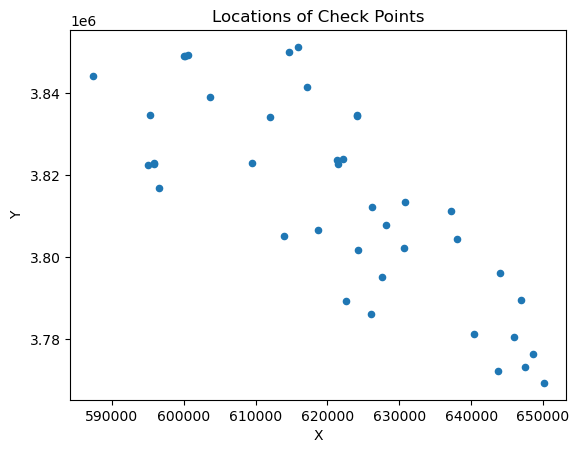

In [35]:
df.plot(x="X", y="Y", kind="scatter", title="Locations of Check Points")

In [27]:
MeanDifference = (df['Lidar-Z'] - df['GPS-Z']).mean()
DeviationDifference = (df['Lidar-Z'] - df['GPS-Z']).std()
table =[['Mean Difference', 'Average standard deviation'],
[MeanDifference, DeviationDifference]]
print(tabulate(table))

-------------------  --------------------------
Mean Difference      Average standard deviation
0.07010000000000005  0.12297629540187603
-------------------  --------------------------


In [28]:
MeanDifference_North = ((df[df['Region']==('North')]['Lidar-Z']) - (df[df['Region']==('North')]['GPS-Z'])).mean()
DeviationDifference_North = ((df[df['Region']==('North')]['Lidar-Z']) - (df[df['Region']==('North')]['GPS-Z'])).std()
MeanDifference_South = ((df[df['Region']==('South')]['Lidar-Z']) - (df[df['Region']==('South')]['GPS-Z'])).mean()
DeviationDifference_South = ((df[df['Region']==('South')]['Lidar-Z']) - (df[df['Region']==('South')]['GPS-Z'])).std()
table_region =[['Region', 'Mean Difference', 'Average standard deviation'],
['North', MeanDifference_North, DeviationDifference_North], ['South', MeanDifference_South, DeviationDifference_South]]
print(tabulate(table_region))

------  ---------------------  --------------------------
Region  Mean Difference        Average standard deviation
North   0.13969999999999913    0.11737394133820266
South   0.0005000000000009664  0.0840679549687732
------  ---------------------  --------------------------


In [29]:
MeanDifference_Asphalt = ((df[df['LandCover']==('Asphalt')]['Lidar-Z']) - (df[df['LandCover']==('Asphalt')]['GPS-Z'])).mean()
DeviationDifference_Asphalt = ((df[df['LandCover']==('Asphalt')]['Lidar-Z']) - (df[df['LandCover']==('Asphalt')]['GPS-Z'])).std()

MeanDifference_Dirt = ((df[df['LandCover']==('Dirt')]['Lidar-Z']) - (df[df['LandCover']==('Dirt')]['GPS-Z'])).mean()
DeviationDifference_Dirt = ((df[df['LandCover']==('Dirt')]['Lidar-Z']) - (df[df['LandCover']==('Dirt')]['GPS-Z'])).std()

MeanDifference_Forest = ((df[df['LandCover']==('Forest')]['Lidar-Z']) - (df[df['LandCover']==('Forest')]['GPS-Z'])).mean()
DeviationDifference_Forest = ((df[df['LandCover']==('Forest')]['Lidar-Z']) - (df[df['LandCover']==('Forest')]['GPS-Z'])).std()

MeanDifference_Grass = ((df[df['LandCover']==('Grass')]['Lidar-Z']) - (df[df['LandCover']==('Grass')]['GPS-Z'])).mean()
DeviationDifference_Grass = ((df[df['LandCover']==('Grass')]['Lidar-Z']) - (df[df['LandCover']==('Grass')]['GPS-Z'])).std()

MeanDifference_Scrub = ((df[df['LandCover']==('Scrub')]['Lidar-Z']) - (df[df['LandCover']==('Scrub')]['GPS-Z'])).mean()
DeviationDifference_Scrub = ((df[df['LandCover']==('Scrub')]['Lidar-Z']) - (df[df['LandCover']==('Scrub')]['GPS-Z'])).std()

table_LandCover =[['LandCover', 'Mean Difference', 'Average standard deviation'],
['Asphalt', MeanDifference_Asphalt, DeviationDifference_Asphalt], 
['Dirt', MeanDifference_Dirt, DeviationDifference_Dirt],
['Forest', MeanDifference_Forest, DeviationDifference_Forest],
['Grass', MeanDifference_Grass, DeviationDifference_Grass],
['Scrub', MeanDifference_Scrub, DeviationDifference_Scrub]
]
print(tabulate(table_LandCover))

---------  --------------------  --------------------------
LandCover  Mean Difference       Average standard deviation
Asphalt    0.048714285714283836  0.09686367445317716
Dirt       0.019142857142854148  0.05856457567343605
Forest     0.1061428571428605    0.19011788322987827
Grass      0.07890000000000086   0.1270830437155183
Scrub      0.08855555555555601   0.12062245967388548
---------  --------------------  --------------------------


From the computations above it seems to be that measurement quality is affected by both LandCover & Region.

Text(0.5, 1.0, 'Mean Difference of LiDAR-Z & GPS-Z by Region and Land Coverage')

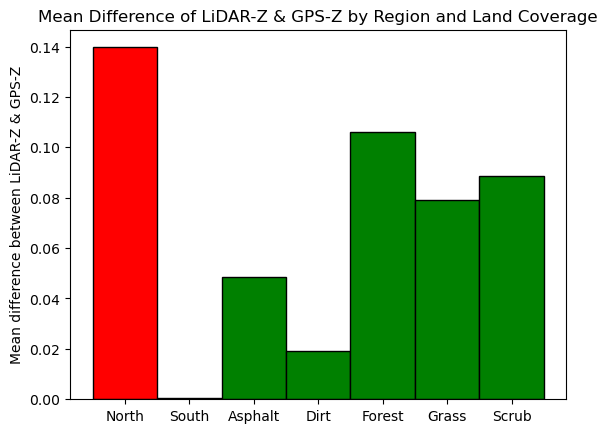

In [50]:
names = ['North', 'South','Asphalt','Dirt','Forest','Grass','Scrub']
values_mu = [MeanDifference_North, MeanDifference_South, MeanDifference_Asphalt, MeanDifference_Dirt, MeanDifference_Forest, MeanDifference_Grass, MeanDifference_Scrub]
plt.bar(names, values_mu, width=1, color = ['red', 'red', 'green', 'green', 'green', 'green', 'green'], edgecolor = 'black')
plt.ylabel("Mean difference between LiDAR-Z & GPS-Z")
plt.title("Mean Difference of LiDAR-Z & GPS-Z by Region and Land Coverage")